# PACIENTI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import DictReader

In [2]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_exp = dict()
data_info = dict()

for row in reader:
    data_exp[row["Gene ID"]] = []
    for key, value in row.items():
        if key != "Gene ID" and key != "Gene Name":
            data_exp[row["Gene ID"]] += [float(value)]
            

fd = open("PR_pacienti2_opis.csv", "rt", encoding="utf-8")
reader = DictReader(fd)

for row in reader:
    data_info[row["Run"]] = dict()
    data_info[row["Run"]]["age"] = int(row["Sample Characteristic[age]"][:2])
    data_info[row["Run"]]["smoke"] = row["Sample Characteristic[clinical information]"]
    data_info[row["Run"]]["person"] = row["Sample Characteristic[individual]"]
    data_info[row["Run"]]["tissue"] = row["Sample Characteristic[sampling site]"]
    data_info[row["Run"]]["gender"] = row["Sample Characteristic[sex]"]
        

In [3]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_imenaGenov= dict()

for row in reader:
    data_imenaGenov[row["Gene ID"]] = row["Gene Name"]
data_imenaGenov

{'ENSG00000000003': 'TSPAN6',
 'ENSG00000000005': 'TNMD',
 'ENSG00000000419': 'DPM1',
 'ENSG00000000457': 'SCYL3',
 'ENSG00000000460': 'C1orf112',
 'ENSG00000000938': 'FGR',
 'ENSG00000000971': 'CFH',
 'ENSG00000001036': 'FUCA2',
 'ENSG00000001084': 'GCLC',
 'ENSG00000001167': 'NFYA',
 'ENSG00000001460': 'STPG1',
 'ENSG00000001461': 'NIPAL3',
 'ENSG00000001497': 'LAS1L',
 'ENSG00000001561': 'ENPP4',
 'ENSG00000001617': 'SEMA3F',
 'ENSG00000001626': 'CFTR',
 'ENSG00000001629': 'ANKIB1',
 'ENSG00000001630': 'CYP51A1',
 'ENSG00000001631': 'KRIT1',
 'ENSG00000002016': 'RAD52',
 'ENSG00000002079': 'MYH16',
 'ENSG00000002330': 'BAD',
 'ENSG00000002549': 'LAP3',
 'ENSG00000002586': 'CD99',
 'ENSG00000002587': 'HS3ST1',
 'ENSG00000002726': 'AOC1',
 'ENSG00000002745': 'WNT16',
 'ENSG00000002746': 'HECW1',
 'ENSG00000002822': 'MAD1L1',
 'ENSG00000002834': 'LASP1',
 'ENSG00000002919': 'SNX11',
 'ENSG00000002933': 'TMEM176A',
 'ENSG00000003056': 'M6PR',
 'ENSG00000003096': 'KLHL13',
 'ENSG00000003

In [4]:
fs = open("testfile1.csv", "rt")
reader = DictReader(fs)

data_stat = dict()

for row in reader:
    data_stat[row["geneId"]] = row["lung"]

data_stat_keys = set()
for key in data_stat:
    data_stat_keys.add(key)

In [5]:
data_presek = dict() #podatki za vse gene, ki so v obeh setih podatkov
for key, value in data_exp.items():
    if key in data_stat_keys:
        data_presek[key] = value
len(data_presek)

19503

**NE POGANJAJ -> traja ... -> rezultati so v datoteki GeniMatrika**

In [6]:
"""matrika = np.empty((0,670), dtype = float)

for key, value in data_presek.items():
    matrika = np.vstack((matrika, value))"""

'matrika = np.empty((0,670), dtype = float)\n\nfor key, value in data_presek.items():\n    matrika = np.vstack((matrika, value))'

In [7]:
data_geni = []
data_runs = []
for key in data_presek:
    data_geni += [key]

fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

for row in reader:
    for key in row:
        if key != "Gene ID" and key != "Gene Name":
            data_runs += [key]
    break

In [8]:
import pandas as pd

In [9]:
# Zapis generirane matrike

"""matrika_izpis = matrika
matrika_izpis = np.array(matrika_izpis, dtype = str)

headers = data_runs
levo = data_geni
df = pd.DataFrame(matrika_izpis, columns=headers, index=levo)
df.to_csv("GeniMatrika.csv")"""

'matrika_izpis = matrika\nmatrika_izpis = np.array(matrika_izpis, dtype = str)\n\nheaders = data_runs\nlevo = data_geni\ndf = pd.DataFrame(matrika_izpis, columns=headers, index=levo)\ndf.to_csv("GeniMatrika.csv")'

In [10]:
matrika_whole = np.loadtxt('GeniMatrika.csv', delimiter=",", skiprows=1, dtype = str)
matrika_whole

array([['ENSG00000000003', '3330.0', '3018.0', ..., '66.0', '310.0',
        '331.0'],
       ['ENSG00000000005', '9.0', '0.0', ..., '0.0', '2.0', '0.0'],
       ['ENSG00000000419', '1202.0', '1587.0', ..., '118.0', '568.0',
        '615.0'],
       ...,
       ['ENSG00000281613', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['ENSG00000281887', '0.0', '0.0', ..., '1.0', '0.0', '0.0'],
       ['ENSG00000281899', '0.0', '0.0', ..., '0.0', '0.0', '0.0']],
      dtype='<U15')

**METODA maska** se uporablja s spodajnavedenimi argumenti

In [11]:
#OMEJITVE
AGE_MIN = 0
AGE_MAX = 0
SMOKER = True #"smoker" / "ex-smoker" / "non-smoker"
PERSON = True #L400 - L881
TISSUE = True #"tumor tissue" / "non-malignant tissue"
GENDER = True #"male" / "female"


def isAge(run, AGE_MIN, AGE_MAX):
    run_age = int(data_info[run]["age"])
    return(AGE_MIN<=run_age and AGE_MAX>=run_age)

def isSmoker(run, SMOKER):
    return(data_info[run]["smoke"] == SMOKER or SMOKER == True)

def isPerson(run, PERSON):
    return(data_info[run]["person"] == PERSON or PERSON == True)
    
def isTissue(run, TISSUE):
    return(data_info[run]["tissue"] == TISSUE or TISSUE == True)

def isGender(run, GENDER):
    return(data_info[run]["gender"] == GENDER or GENDER == True)

def isALL(run, AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER):
    return(isAge(run, AGE_MIN, AGE_MAX) and isSmoker(run, SMOKER) and isPerson(run, PERSON) and
           isTissue(run, TISSUE) and isGender(run, GENDER))

def maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True):
    pacient_bool = np.full((1,len(pacienti)), True, dtype = bool)[0]
    for i in range(len(pacienti)):
        pacient_bool[i] = isALL(pacienti[i], AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER)
    return pacient_bool

def uporabiMasko(matrika, maska):
    matrika_p = matrika
    matrika_p = np.transpose(matrika_p)
    matrika_p = matrika_p[maska, :]
    return np.transpose(matrika_p)

In [12]:
matrika_lung = []
for key in data_presek:
    matrika_lung += [float(data_stat[key])]

**OBDELVAVA PODATKOV**

In [13]:
gn = open("VTSGgeni.csv", "rt")
reader = DictReader(gn)
geni5plus = []

for row in reader:
    geni5plus += [row["geneName"]]
geni5plus = set(geni5plus)

In [14]:
geni_bool = np.full((1,19503), False, dtype=bool)[0]

for i in range(len(matrika_whole)):
    if data_imenaGenov[matrika_whole[i][0]] in geni5plus:
        geni_bool[i] = True
geni_bool

array([ True, False,  True, ..., False,  True, False])

In [15]:
matrika = matrika_whole[geni_bool, 1:]
matrika = np.array(matrika, dtype = float)
data_geni_red = matrika_whole[geni_bool, :1]

In [16]:
matrika.shape

(11469, 670)

In [17]:
matrika_norm = np.zeros((matrika.shape[0], matrika.shape[1]), dtype = float)

for i in range(len(matrika_norm)):
    for j in range(len(matrika_norm[i])):
        if matrika_lung[i]>0:
            matrika_norm[i][j] = matrika[i][j]/matrika_lung[i]
        else:
            matrika_norm[i][j] = 0.0

**matrika_norm** je matrika normaliziranih vrednosti glede na povprečno ekspresijo v pljučnem tkivu.
Vrednost 1 pomeni normalno, >1 povišano ekspresijo, <1 znižano ekspresijo

## ANALIZE PODATKOV

Tu se začnejo prave analize --> Spodaj naveden primer, kako jih delati.

Uporabljali bomo navadno matriko: **matrika** (stolpci pacienti, vrstice ekspresije genov)

Uporabljamo lahko tudi normalizirano matriko: **matrika_norm** (stolpci pacienti, vrstice ekspresije genov) - bolj primerna je normalizacija glede na kontrolno skupino pacientov.

Za reduciranje so atributih pacientov se uporablja maska: 

    maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True)
    
Karkoli ni **True** moraš navesti, kaj želiš gledat. Možnosti so navedene pri sami definiciji.

Če uporabljata matriko_norm, jo najprej prepišita v novo spremenljivko, da ne bomo izgubljali podatkov zaradi bedarij.

Analize označujta z zaporedno številko in dovolj opisnim imenom (npr. **0. Analiza ekspresije genov glede na spol**)

**matrika_norm** je matrika normaliziranih vrednosti glede na povprečno ekspresijo v pljučnem tkivu.
Vrednost 1 pomeni normalno, >1 povišano ekspresijo, <1 znižano ekspresijo

### 0. Analiza ekspresije genov glede na spol

**Prepis podatkov in začetne inicializaicije**

In [18]:
matrika_spol = matrika

#Uporabim masko za ženski spol
mask = maska(GENDER="female")
matrika_zenske = uporabiMasko(matrika_spol, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš

#Uporabim masko za moški spol
mask = maska(GENDER = "male")
matrika_moski = uporabiMasko(matrika_spol, mask)

In [19]:
matrika_moski.shape, matrika_zenske.shape #Moški so bolj in shape (this is a joke)

((11469, 319), (11469, 351))

**Primerjava ekspresije pri ženskah**

In [20]:
#Dve matriki -> ženske z rakom, ženske brez raka(kontrola)
matrika_zenske_tumor = uporabiMasko(matrika_spol, maska(GENDER = "female", TISSUE = "tumor tissue"))
matrika_zenske_normal = uporabiMasko(matrika_spol, maska(GENDER = "female", TISSUE = "non-malignant tissue"))

In [21]:
matrika_zenske_tumor.shape

(11469, 325)

In [22]:
#Poglejmo variance v ekspresiji genov za vsak gen

#ŽENSKE S TUMORJEM
zenske_tumor_var = []

for i in range(len(matrika_zenske_tumor)):
    zenske_tumor_var += [np.var(matrika_zenske_tumor[i])/np.mean(matrika_zenske_tumor[i])]

#ŽENSKE BREZ TUMORJA
zenske_normal_var = []

for i in range(len(matrika_zenske_normal)):
    zenske_normal_var += [np.var(matrika_zenske_normal[i])/np.mean(matrika_zenske_normal[i])]

zenske_normal_var

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


[429.9952431476569,
 501.76051509466146,
 478.8787083223943,
 141.7154956956401,
 1219.8898694913646,
 790.4295914645919,
 847.8072999969824,
 160.34396358358623,
 951.3461362948276,
 749.399655388235,
 1746.552199000302,
 602.6807165437303,
 1361.9482603368613,
 124.16407682656113,
 1021.7636185470582,
 222.75693739929582,
 236.72589942357388,
 3570.093097555727,
 2015.872133482789,
 241.10576288398067,
 4629.433141680915,
 419.49123851194116,
 771.3505157145337,
 3567.7730303748726,
 121.76923076923076,
 200.43255867999076,
 524.899018848978,
 91.7088025376685,
 835.5188974378215,
 976.218313599046,
 7104.242323801342,
 4404.840430826105,
 343.32046201266814,
 4008.312061185381,
 1054.566098168498,
 577.2229638949905,
 1058.0673917918816,
 4243.146342081746,
 2194.474632624579,
 733.7485600473706,
 701.7008220786846,
 1158.7957336219454,
 4976.493730336055,
 256.1020597274028,
 1574.1457898708331,
 634.7850340383706,
 234.28828648594578,
 330.881842814159,
 8600.410337070598,
 418.18

Varijanco sem normaliziral glede na povprečno ekspresijo gena v tkivu -> dobimo tak graf

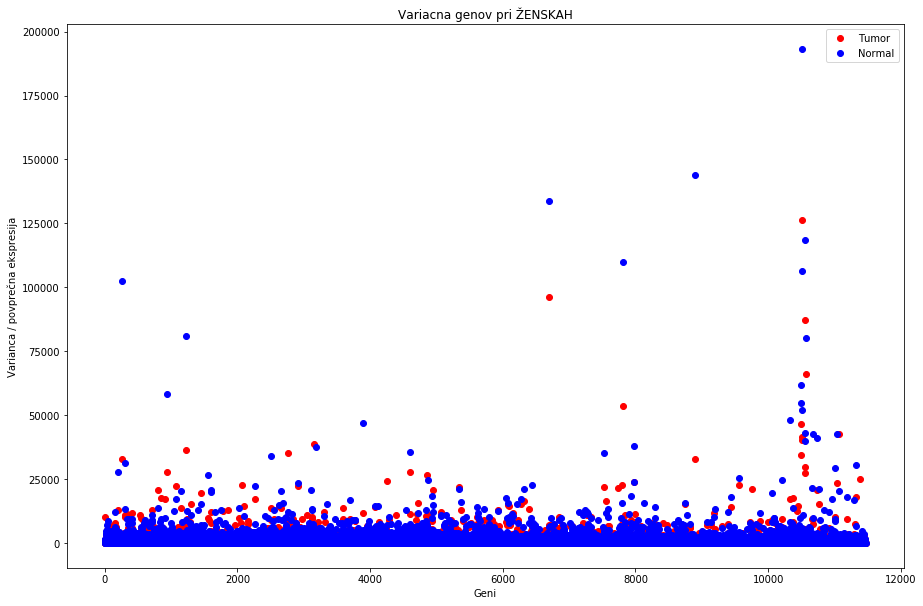

In [23]:
#GREMO NARISAT VARIANCE --> Prosim označujta grafe in legende in tako dalje...

plt.figure(figsize=(15,10))
plt.plot(zenske_tumor_var, "ro", label = "Tumor")
plt.plot(zenske_normal_var, "bo", label = "Normal")
plt.xlabel("Geni")
plt.ylabel("Varianca / povprečna ekspresija")
plt.title("Variacna genov pri ŽENSKAH")
plt.legend()
plt.show()

Vidimo, da se ravnovesje varianc poruši, kar je značilno za rakava tkiva.

Ideja za naprej: GRUČENJE PACIENTOV -> Ali se dajo ustriti skupine razičnih rakov pri ženskah?

Vidimo, da se pri noramlnem tkivu ne spreminja zelo veliko (var/povpr ~ 0). Lahko naredimo normalizacijo po povprečju kontrole in izvedemo gručenje glede na njih.

In [24]:
#NORMALIZACIJA NA KONTROLNO TKIVO

zenske_tumor_norm = np.zeros(matrika_zenske_tumor.shape)

for i in range(len(matrika_zenske_tumor)):
    povp = np.mean(matrika_zenske_normal[i])
    for j in range(len(matrika_zenske_tumor[i])):
        if povp == 0:
            zenske_tumor_norm[i][j] = 1.0
        else:
            zenske_tumor_norm[i][j] = matrika_zenske_tumor[i][j]/povp

zenske_tumor_norm

array([[ 6.57072797, 10.89808429,  6.26390805, ...,  4.96888889,
         2.49042146,  8.37578544],
       [ 3.62616408,  4.34966741,  5.0443459 , ...,  3.10443459,
         2.90266075,  2.25121951],
       [ 5.35836177,  3.57337884,  2.59044369, ...,  3.27645051,
         2.53924915,  1.44368601],
       ...,
       [ 5.59625668,  6.53475936,  2.5026738 , ...,  9.73262032,
         3.71925134,  2.9197861 ],
       [ 2.44081633,  1.80408163,  1.91020408, ...,  1.11428571,
         2.1755102 ,  0.63673469],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

**POSKUSIMO IZVESTI HIERARHIČNO GRUČENJE**

In [25]:
import scipy.cluster.hierarchy as sch
import scipy

In [26]:
# NE POZABI TRANSPONIRAT MATRIKE
matrika_dendrogram = np.transpose(zenske_tumor_norm)
matrika_dendrogram.shape

(325, 11469)

Ker je velika matrika potrebuje tut metoda velik časa

In [56]:
L = sch.linkage(matrika_dendrogram, method="ward", metric="euclidean") #metric & method bo treba optimizirat
t = 2700
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

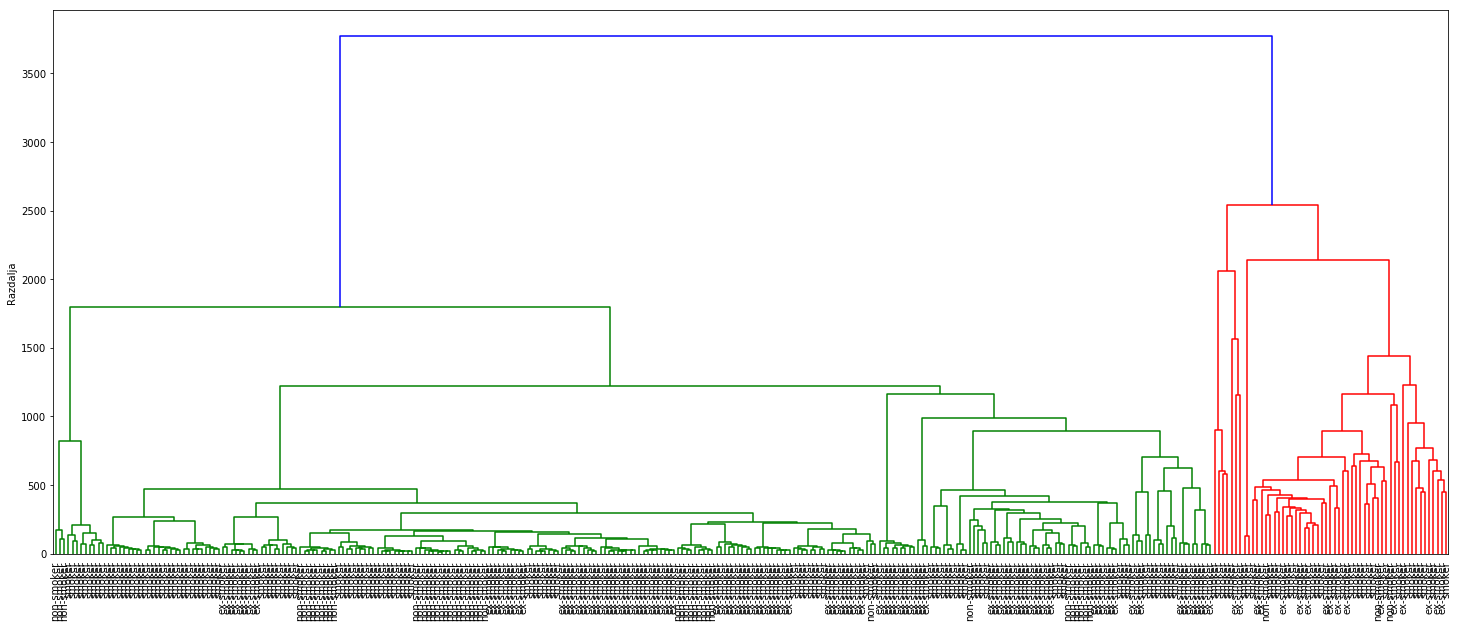

In [28]:
plt.figure(figsize=(25, 10))
runs = np.array(data_runs)[maska(GENDER = "female", TISSUE = "tumor tissue")]
labels = [data_info[x]["smoke"] for x in runs] #IZPISE KDO JE KADILEC --> (spreminjaj napis za ostale stvari)
D      = sch.dendrogram(L, labels = labels, leaf_font_size=10)
plt.ylabel("Razdalja")
plt.show()

Tole ima večjo smiselnost! --> Izgledata kot dve različni obliki raka (morda več - 3,4,5?). Morda pričakujemo pri moškem enako.

Vidimo, da ima rdeča skupina **samo 3 nekadilce** in ostalo kadilci! --> note the fact

**Obliko bi se dalo napovedovati! --> Razmisli o klasifikatorju?**

### NADALJNE IDEJE IN STVARI KI JIH BOMO IZVEDLI

Nekaj idej za pregledat:
- Analiza za moške (enak način kot zgoraj)
- Analiza po letih (ekspresije genov, ki se nabolj spreminjajo s starostjo, itd.)
- Analiza kadilec/bivši-kadilec/nekadilec (ekspresije genov, ki so različne, itd.)
    - povezava gen - kadilec?
- Iskanje gruč -> različne oblike rakov (NMF napovedni model oz. nek klasifikator - drevo?)  -->> MARTIN
- po želji -> vstavi svojo idejo

Napišem še kakšno idejo, ko se jo spomnim.

Idejo napiši v discord, da razmislim ali je izvedljiva/smiselna. Upoštevajta zgoraj navedene smernice (Številčenje, doslednost, opis stvari -> da bom znal za vama brat in izvlečt rezultate.)

Naj bodo stvari grafično lepe, vse oznake stranic, naslovi itd.

Srečno :)

**Studentova funkcija in izpis genov z največjim izražanjem**

In [39]:
from scipy.stats import t as student
import numpy as np

In [40]:
def meanStudent(seznamExp):
    xr = np.linspace(0,100, 1000)
    pars = student.fit(seznamExp)
    P_fit = [student.pdf(x, *pars) for x in xr ]
    return(P_fit.index(max(P_fit))*0.1)

In [41]:
zenske_tumor_norm.shape #PAZI DA JE PRAV OBRNJENO

(11469, 325)

In [42]:
ZELENA_matrika = zenske_tumor_norm #pac neka tvoja matrika

maskaPovp = []
MEJA = 1.5
for i in range(len(ZELENA_matrika)):
    maskaPovp += [np.mean(ZELENA_matrika[i])]
maskaPovp_bool = (np.array(maskaPovp) > MEJA)
sum(maskaPovp_bool)

1359

In [43]:
studentGenov = [] #Tale zna malo trajat
for i in range(len(ZELENA_matrika)):
    if maskaPovp_bool[i]==False:
        studentGenov+=[MEJA]
    else:
        studentGenov+=[meanStudent(ZELENA_matrika[i])]
    

In [44]:
len(studentGenov)

11469

In [45]:
studentGenov_sorted = (sorted(studentGenov)[::-1])[:20]
top20genov = []

for i in range(len(studentGenov)):
    if studentGenov[i] in studentGenov_sorted:
        top20genov+= [(data_geni[i], studentGenov[i])]
top20genov

[('ENSG00000011465', 3.4000000000000004),
 ('ENSG00000013392', 2.9000000000000004),
 ('ENSG00000027075', 4.3),
 ('ENSG00000048991', 2.8000000000000003),
 ('ENSG00000075790', 2.6),
 ('ENSG00000077092', 3.2),
 ('ENSG00000077585', 3.4000000000000004),
 ('ENSG00000078596', 3.0),
 ('ENSG00000088766', 3.4000000000000004),
 ('ENSG00000107175', 3.0),
 ('ENSG00000116957', 2.7),
 ('ENSG00000121570', 5.1000000000000005),
 ('ENSG00000122068', 2.9000000000000004),
 ('ENSG00000124302', 2.6),
 ('ENSG00000125449', 3.9000000000000004),
 ('ENSG00000132975', 4.6000000000000005),
 ('ENSG00000136560', 2.7),
 ('ENSG00000147676', 4.2),
 ('ENSG00000152932', 3.5),
 ('ENSG00000156050', 2.6),
 ('ENSG00000158234', 3.7),
 ('ENSG00000160404', 3.7)]

In [49]:
#VARIANCE 
top20var = []
for tup in top20genov:
    top20var += [(np.mean(ZELENA_matrika[data_geni.index(tup[0])]), np.var(ZELENA_matrika[data_geni.index(tup[0])]), np.var(ZELENA_matrika[data_geni.index(tup[0])])/np.mean(ZELENA_matrika[data_geni.index(tup[0])]))]
top20var

[(10.32593886462882, 258.17496215556525, 25.002565436440406),
 (11.811190883190884, 662.9833387858, 56.131794443295796),
 (11.922926829268294, 633.312144199881, 53.11717108296195),
 (8.41556886227545, 163.46259815697942, 19.42383228420063),
 (9.689264475743348, 259.74668558903414, 26.807678357763756),
 (11.046837606837608, 363.3194442252904, 32.88900019679915),
 (13.614440433213, 590.8423756337239, 43.39821225353773),
 (8.594416243654823, 178.23272694478086, 20.73820046549042),
 (9.59226723525231, 270.76923017039894, 28.227865584822478),
 (8.923308270676692, 205.44080954265365, 23.022942087270756),
 (5.771732321996575, 51.87764716675821, 8.988228190875722),
 (9.950805341966815, 140.6947440404033, 14.139030882961121),
 (10.493439999999998, 632.8128651264, 60.30556853866798),
 (9.5472, 343.11959552, 35.939290631808284),
 (8.057046413502109, 118.40768355498582, 14.696165006143765),
 (7.993450087565675, 109.78931270116335, 13.734909394373737),
 (8.953170731707317, 143.5965626809439, 16.038

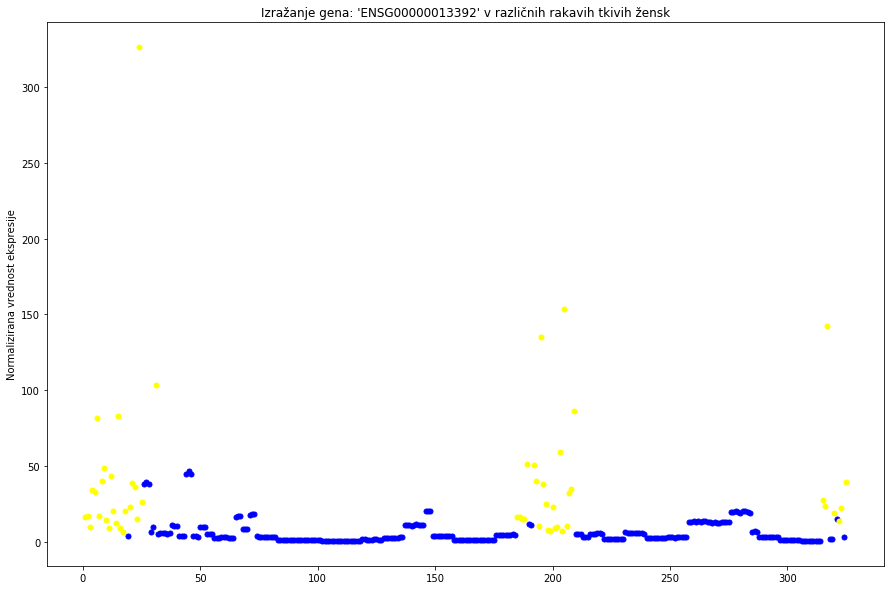

In [69]:
plt.figure(figsize = (15,10))
color = {0:"red", 1:"blue", 2:"yellow"}
label = {1:"Rak 1", 2:"Rak 2"}
i = 0
for c, x in zip(predictions, ZELENA_matrika[data_geni.index('ENSG00000013392')]):
    i+=1
    plt.plot(i, x, ".", color=color[c], markersize=10.0)
plt.title("Izražanje gena: 'ENSG00000013392' v različnih rakavih tkivih žensk")
plt.ylabel("Normalizirana vrednost ekspresije")
plt.legend()
plt.show()

**DEFINIRANJE DVEH TIPOV RAKA**

In [107]:
matrika_rak = matrika
matrika_rak_normal = uporabiMasko(matrika_rak, maska(TISSUE="non-malignant tissue"))
matrika_rak_tumor = uporabiMasko(matrika_rak, maska(TISSUE="tumor tissue"))

matrika_rak_norm = np.zeros(matrika_rak_tumor.shape)
for i in range(len(matrika_rak_tumor)):
    povp = np.mean(matrika_rak_normal[i])
    if povp == 0:
        continue
    for j in range(len(matrika_rak_tumor[i])):
        matrika_rak_norm[i][j] = matrika_rak_tumor[i][j]/povp
matrika_rak_norm

array([[14.47196871, 13.11603651,  7.16644937, ...,  7.36201651,
         6.80573664,  9.13515863],
       [ 3.96437995,  5.23416887,  4.14907652, ...,  5.46503958,
         5.23746702,  2.57585752],
       [ 6.29264283,  4.1512536 ,  6.45293876, ...,  2.52774353,
         4.29099877,  1.73859433],
       ...,
       [ 5.64727955, 10.02501563,  7.0481551 , ...,  6.56660413,
         2.67041901,  3.67729831],
       [ 4.21330517,  3.17845829,  3.40021119, ...,  2.21752904,
         4.87856389,  0.88701162],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [108]:
matrika_dendrogram = np.transpose(zenske_tumor_norm)
matrika_dendrogram.shape

(325, 11469)

In [109]:
matrika_dendrogram = np.transpose(matrika_rak_norm)
matrika_dendrogram.shape

(600, 11469)

In [173]:
L = sch.linkage(matrika_dendrogram, method="complete", metric="cityblock")   
t = 60000
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
print(predictions)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1
 1 3 1 3 3 3 3 3 1 1 3 3 1 3 1 3 1 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 1 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

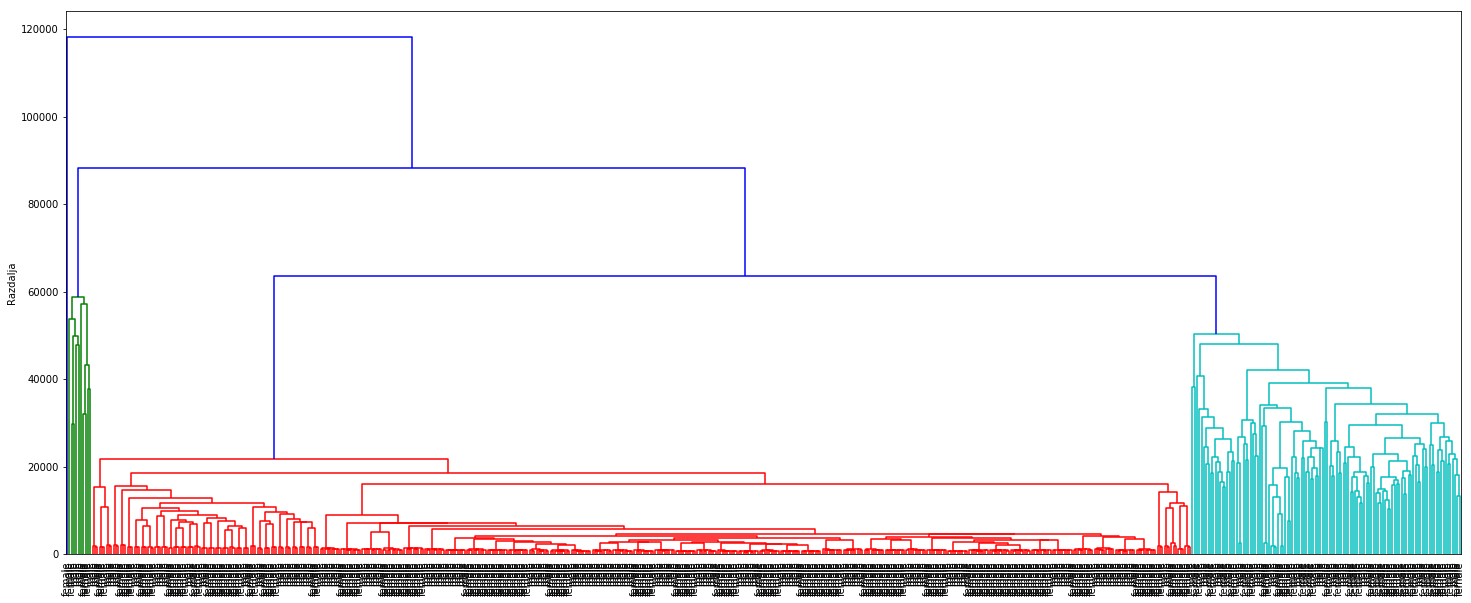

In [174]:
plt.figure(figsize=(25, 10))
runs = np.array(data_runs)[maska(TISSUE = "tumor tissue")]
labels = [data_info[x]["gender"] for x in runs] #IZPISE KDO JE KADILEC --> (spreminjaj napis za ostale stvari)
D      = sch.dendrogram(L, labels = labels,color_threshold = 60000, leaf_font_size=10)
plt.ylabel("Razdalja")
plt.show()

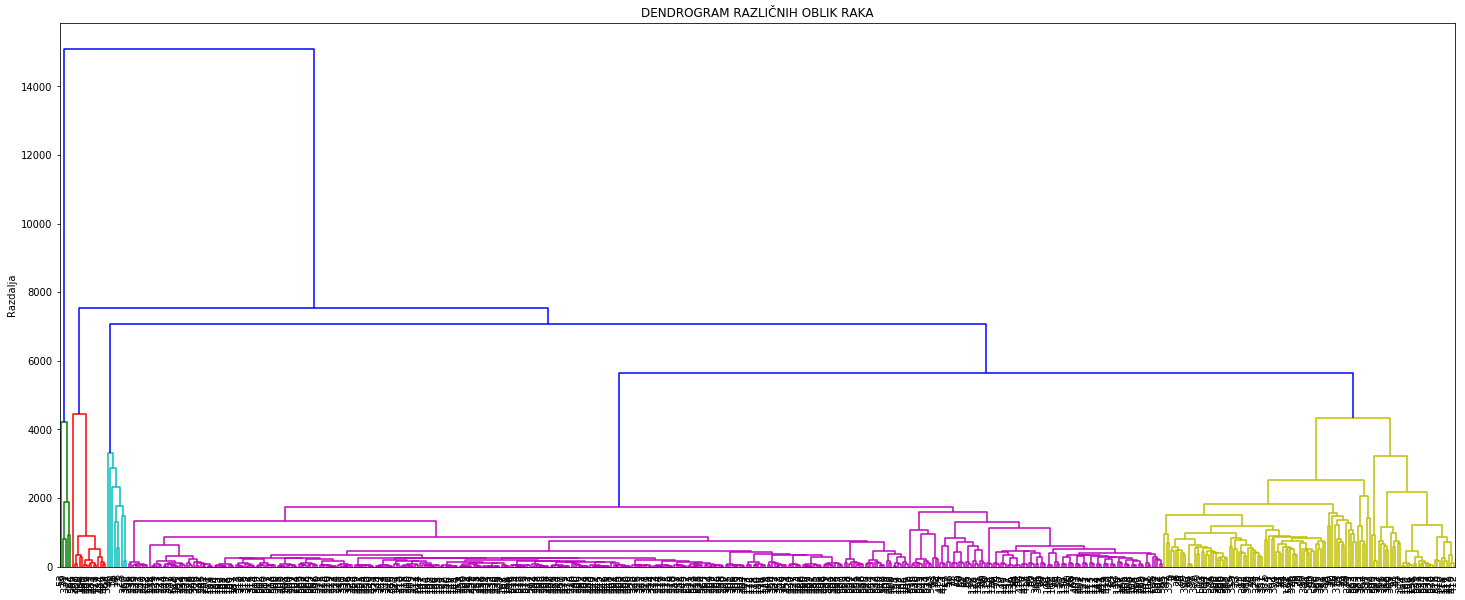

In [367]:
L = sch.linkage(matrika_dendrogram, method="ward", metric="euclidean")   
t = 5000
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()

L = sch.linkage(matrika_dendrogram[(predictions<6)], method="ward", metric="euclidean")   
plt.figure(figsize=(25, 10))
runs = np.array(data_runs)[maska(TISSUE = "tumor tissue")]
#labels = [data_info[x]["gender"] for x in runs[(predictions<6)]] #IZPISE KDO JE KADILEC --> (spreminjaj napis za ostale stvari)
D      = sch.dendrogram(L, color_threshold = 5000, leaf_font_size=10)
plt.ylabel("Razdalja")
plt.title("DENDROGRAM RAZLIČNIH OBLIK RAKA")
plt.show()

**TOP 20 genov v vseh 5 skupinah raka**

In [175]:
L = sch.linkage(matrika_dendrogram, method="ward", metric="euclidean")   
t = 5000
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()

In [182]:
rak_1 = matrika_rak_norm[:, (predictions==1)]
rak_2 = matrika_rak_norm[:, (predictions==2)]
rak_3 = matrika_rak_norm[:, (predictions==3)]
rak_4 = matrika_rak_norm[:, (predictions==4)]
rak_5 = matrika_rak_norm[:, (predictions==5)]
raki = [rak_1, rak_2, rak_3, rak_4, rak_5]

In [240]:
rak_top20 = np.empty((0,rak_1.shape[0]), dtype = float)

for i in range(5):
    print(i)
    rak_n_top20 = []
    
    ZELENA_matrika = raki[i] #pac neka tvoja matrika

    maskaPovp = [] 
    for k in range(len(ZELENA_matrika)):
        maskaPovp += [np.mean(ZELENA_matrika[k])]
        
    MEJA = np.mean(maskaPovp)*3
    maskaPovp_bool = (np.array(maskaPovp) > MEJA)
    
    print(sum(maskaPovp_bool))
    
    for j in range(len(ZELENA_matrika)):
        if i<=2:
            rak_n_top20+=[np.mean(ZELENA_matrika[j])]
        elif maskaPovp_bool[j]==False:
            rak_n_top20+=[MEJA]
        else:
            rak_n_top20+=[meanStudent(ZELENA_matrika[j])]
    rak_top20 = np.vstack((rak_top20, np.array(rak_n_top20)))

0
264
1
156
2
317
3
178
4
200


In [248]:
top20geni = set()
for i in range(len(rak_top20)):
    seznam_sorted = (sorted(rak_top20[i])[::-1])[:20]
    print(seznam_sorted)
    
    for j in range(len(rak_top20[i])):
        if rak_top20[i][j] in seznam_sorted:
            top20geni.add(data_geni[j])
    

[4792.666666666666, 193.16896458502293, 139.06185567010309, 104.03191489361703, 101.94755061365782, 100.22222222222221, 93.85185185185185, 90.66237942122186, 87.978515625, 86.53107344632768, 83.76183431952663, 81.80392156862744, 80.29393536963258, 79.5045871559633, 77.95496688741721, 72.90185312285519, 70.0, 70.0, 65.44690265486724, 65.33333333333334]
[1409.3333333333333, 32.35555555555556, 32.117647058823536, 30.812676853423888, 21.558169934640524, 19.051546391752577, 18.629666336306574, 16.54545454545455, 14.888888888888888, 13.991993634690933, 13.277545327754533, 12.962962962962964, 12.03951890034364, 11.778368794326243, 11.083333333333332, 10.855072463768117, 10.541966426858513, 10.42582283426116, 10.184096183281492, 9.63816689466484]
[1456.5656565656566, 354.9382716049383, 200.66666666666666, 191.03099965168929, 186.66666666666666, 175.0, 152.5308641975309, 140.0, 127.37945492662473, 107.61194029850748, 103.13829787234043, 99.78723404255321, 98.3839243498818, 96.98167239404353, 92

In [270]:
top20geni = np.array(list(top20geni), dtype = str)
rak_student = np.empty((0,top20geni.shape[0]), dtype=float)
print(rak_student)

for i in range(5):
    studenti = []
    for gen in top20geni:
        studenti+= [meanStudent(raki[i][data_geni.index(gen)])]
        
    print(np.array(studenti).shape)
    rak_student = np.vstack((rak_student, np.array(studenti)))

[]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3845: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3845: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


(62,)
(62,)
(62,)
(62,)
(62,)


In [273]:
rak_student

array([[11.2, 56.3, 63.7, 50.2, 87.3,  0. , 33.3, 22.5, 99.9,  0.4,  4. ,
         0. ,  0. , 61.1, 58.8, 65.4,  3.9,  0. , 16.7,  7.1, 79.4, 13.1,
        77.9, 87.7, 99.9,  2.9, 42. , 21.1, 25.4, 41.6, 99.9, 21.2,  2.8,
        99.9, 27.8, 41.4, 38.8, 72.8,  3.5, 29.6,  0. , 13.8, 46.1, 53.2,
        10.6, 99.9,  7.8,  0. , 64.4, 68. , 83.7,  0. , 50.5,  2.7, 10.3,
        54.4, 25.3, 46.8, 35. , 20. ,  3.5,  8.7],
       [ 2. ,  3. ,  3. ,  2.6,  3.5, 99.9,  5.3,  8.4,  0. , 13.1,  4.7,
        32.3, 16. ,  4.9,  9.8,  6.6,  3.6, 10.4,  1.2,  1.1,  3.1,  2.7,
         2.6,  0.9,  5.3,  3.2,  0. ,  0.4,  0. ,  3. ,  1.3, 28.8, 14.2,
         4.3,  3.9,  2.2,  3.3,  2.9, 29.3,  0.4,  0. , 14. ,  9.8,  5.6,
         2.5,  3.6,  3.3, 12.7,  3.5,  4. ,  5.5,  0. ,  7.3,  0.4,  0. ,
         2. , 14.9,  2.3,  0. ,  0.1, 18.2,  7. ],
       [27.7, 46.3, 62.1, 64.1, 15.9,  0. , 26.1, 20.3,  0. ,  0.5, 90.2,
         0. ,  0. , 89. , 99.9, 84.1,  3.2,  0. , 28.8, 34.3, 91.4, 17.4,
        91

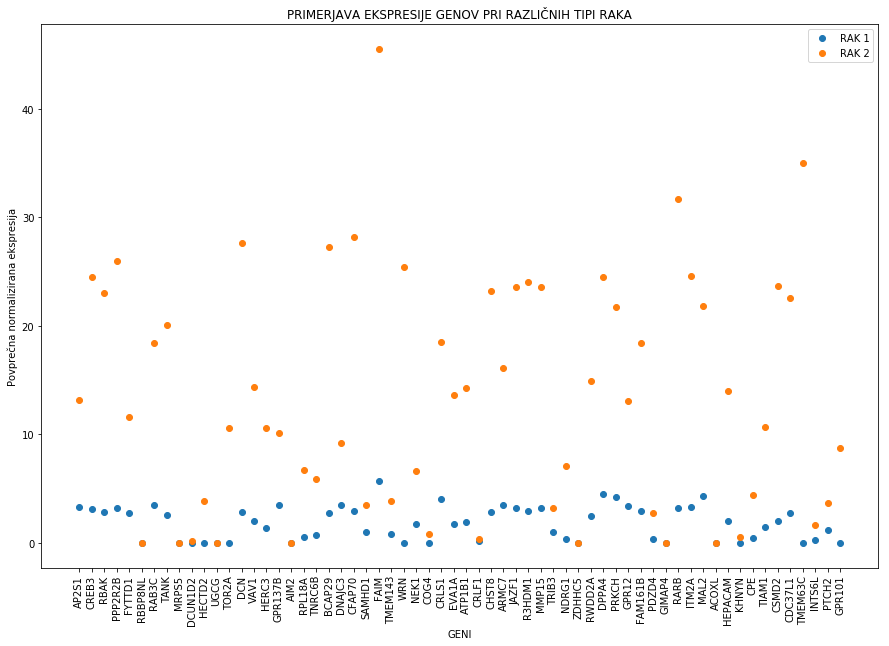

In [338]:
imeGenov = []
for gen in top20geni:
    imeGenov+=[data_imenaGenov[gen]]

plt.figure(figsize=(15,10))
for i in range(3,5):
    plt.plot(rak_student[i], "o", label="RAK "+str(i-2))
plt.legend()
plt.title("PRIMERJAVA EKSPRESIJE GENOV PRI RAZLIČNIH TIPI RAKA")
plt.xlabel("GENI")
plt.ylabel("Povprečna normalizirana ekspresija")
xr = [i for i in range(len(top20geni))]
plt.xticks(xr, imeGenov, rotation='vertical')
plt.show()

**ANALIZA RAKA 1 in RAKA 2 glede na PACIENTE**

In [317]:
#ŠTEVILO BOLNIKOV
rak_4_runs = np.array(data_runs)[maska(TISSUE = "tumor tissue")][(predictions==4)]
rak_5_runs = np.array(data_runs)[maska(TISSUE = "tumor tissue")][(predictions==5)]

rak_4_set_ppl = set()
for run in rak_4_runs:
    rak_4_set_ppl.add(data_info[run]["person"])
    
rak_5_set_ppl = set()
for run in rak_5_runs:
    rak_5_set_ppl.add(data_info[run]["person"])
    
print("ŠT. Pacientov: rak4, rak5, ostali")
print(len(rak_4_set_ppl), len(rak_5_set_ppl), 199-78-104)

ŠT. Pacientov: rak4, rak5, ostali
78 104 17


In [327]:
#Delež non/ex/smoker
clovek_kadi = dict()
for key, value in data_info.items():
    clovek_kadi[value["person"]] = value["smoke"]

kadi4 = []
for ppl in rak_4_set_ppl:
    kadi4+= [clovek_kadi[ppl]]
    
kadi5 = []
for ppl in rak_5_set_ppl:
    kadi5 += [clovek_kadi[ppl]]

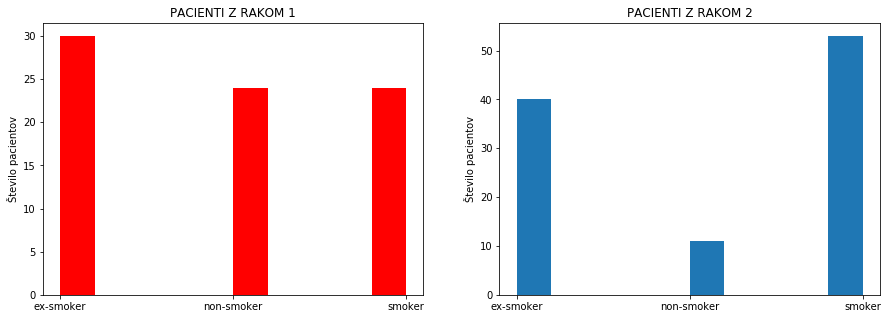

In [349]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title("PACIENTI Z RAKOM 1")
axes[0].hist(kadi4, color="r")
axes[0].set_ylabel("Število pacientov")

axes[1].set_title("PACIENTI Z RAKOM 2")
axes[1].hist(kadi5)
axes[1].set_ylabel("Število pacientov")

plt.show()

In [356]:
#LETA PACIENTOV
clovek_leta = dict()
for key, value in data_info.items():
    clovek_leta[value["person"]] = value["age"]
    
    
age4 = []
for ppl in rak_4_set_ppl:
    try:
        age4+= [clovek_leta[ppl]]
    except KeyError:
        continue
    
age5 = []
for ppl in rak_5_set_ppl:
    try:
        age5+= [clovek_leta[ppl]]
    except KeyError:
        continue

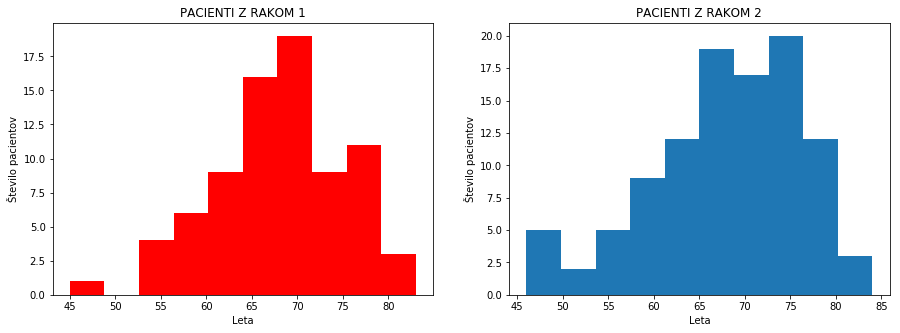

In [361]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].set_title("PACIENTI Z RAKOM 1")
axes[0].hist(age4,bins = 10, color="r")
axes[0].set_ylabel("Število pacientov")
axes[0].set_xlabel("Leta")

axes[1].set_title("PACIENTI Z RAKOM 2")
axes[1].hist(age5, bins = 10)
axes[1].set_ylabel("Število pacientov")
axes[1].set_xlabel("Leta")

plt.show()

In [362]:
clovek_spol = dict()
for key, value in data_info.items():
    clovek_spol[value["person"]] = value["gender"]

spol4 = []
for ppl in rak_4_set_ppl:
    spol4+= [clovek_spol[ppl]]
    
spol5 = []
for ppl in rak_5_set_ppl:
    spol5 += [clovek_spol[ppl]]

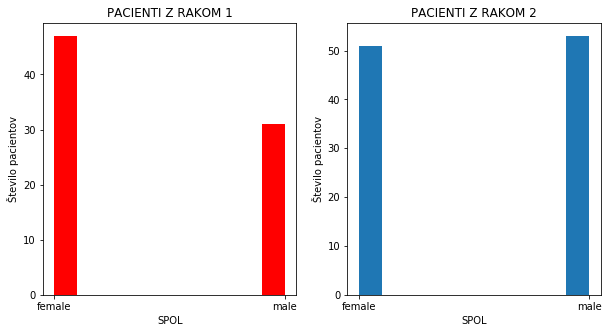

In [365]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title("PACIENTI Z RAKOM 1")
axes[0].hist(spol4, color="r")
axes[0].set_ylabel("Število pacientov")
axes[0].set_xlabel("SPOL")

axes[1].set_title("PACIENTI Z RAKOM 2")
axes[1].hist(spol5)
axes[1].set_ylabel("Število pacientov")
axes[1].set_xlabel("SPOL")

plt.show()